Brief description of the problem and data (5 pts)

Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data.
The Kaggle competition "Natural Language Processing with Disaster Tweets" focuses on developing a machine learning model that categorizes tweets as either related to disasters (target = 1) or not (target = 0). Accurate classification is essential for disaster response organizations to quickly recognize and act on real-time information about disasters.

1.2. Importance of NLP in Disaster Management
Natural Language Processing (NLP) is vital in disaster management as it facilitates:

Early Detection: Quickly spotting emerging disasters through social media.

Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?

5. Data Exploration (EDA)
5.1. Overview of the Data
Begin by examining the structure and basic statistics of the datasets.

```
# Check the shape of the datasets
print(f"Training Data Shape: {train_df.shape}")
print(f"Testing Data Shape: {test_df.shape}")
Sample Output:


Training Data Shape: (7613, 5)
Testing Data Shape: (3263, 4)
```
5.2. Handling Missing Values
Address missing values in the 'keyword' and 'location' columns by filling them with 'No'.
```
# Fill missing values in 'keyword' and 'location' with 'No'
train_df.fillna({'keyword': 'No'}, inplace=True)
train_df.fillna({'location': 'No'}, inplace=True)

test_df.fillna({'keyword': 'No'}, inplace=True)
test_df.fillna({'location': 'No'}, inplace=True)

# Check for any remaining missing values
print("\nMissing Values After Imputation (Training Data):")
print(train_df.isnull().sum())

print("\nMissing Values After Imputation (Testing Data):")
print(test_df.isnull().sum())
Sample Output:

mathematica
Missing Values After Imputation (Training Data):
id 0
keyword 0
location 0
text 0
target 0
dtype: int64

Missing Values After Imputation (Testing Data):
id 0
keyword 0
location 0
text 0
dtype: int64
```
Explanation:

By replacing NaNs with 'No', we ensure that the 'keyword' and 'location' columns contain valid string values for every entry.
5.3. Target Variable Distribution
Visualize the distribution of the target classes to identify any class imbalance.

```
# Plot the distribution of target classes
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=train_df, palette='viridis')
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Disaster', 'Disaster'])
plt.show()
```


Model Architecture (25 pts)

Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem.

Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.  

There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.

Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.).


7.1. Model Selection
For this classification task, we can consider several models. We'll begin with traditional machine learning models because of their efficiency and interpretability. Possible models include:

- Logistic Regression: A baseline model for binary classification.
- Support Vector Machine (SVM): Works well in high-dimensional spaces.
- Random Forest Classifier: Capable of handling non-linear relationships and assessing feature importance.
- Ensemble Methods: Combines multiple models to enhance performance.

Given the computational constraints and the nature of the data, our focus will be on Logistic Regression, SVM, and Random Forest classifiers.

7.2. Handling Class Imbalance
The target variable is imbalanced, with a greater number of "Disaster" tweets compared to "Not Disaster" tweets. To tackle this issue:

- Class Weights: Assign higher weights to the minority class to penalize misclassifications.
- Resampling Techniques: Oversample the minority class or undersample the majority class (not implemented here to avoid potential data loss).

We will use class weights in our models to address the imbalance.

8. Model Building and Training
8.1. Logistic Regression
We will train a Logistic Regression model with class weights to manage the imbalance.

```
# Split the data into training and validation sets
X = train_feats_modern
y = train_df['target']

X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
```

Sample Output:

```
Training samples: 6089
Validation samples: 1524
```

Explanation:

Stratified Split: This ensures that both the training and validation sets maintain the same class distribution as the original dataset.


Results and Analysis (35 pts)

Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.

Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.


9. Results and Analysis
9.1. Evaluation Metrics
To assess each model, we will use the F1 Score, which effectively balances precision and recall.

```
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Function to evaluate and display results
def evaluate_model(model, X_val, y_val, model_name):
y_pred = model.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f"F1 Score for {model_name}: {f1:.4f}")
print(f"Classification Report for {model_name}:\n")
print(classification_report(y_val, y_pred, target_names=['Not Disaster', 'Disaster']))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Not Disaster', 'Disaster'],
yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {model_name}')
plt.show()

# Evaluate Logistic Regression
evaluate_model(logreg, X_val, y_val, "Logistic Regression")

# Evaluate SVM
evaluate_model(svm_clf, X_val, y_val, "Support Vector Machine")

# Evaluate Random Forest
evaluate_model(rf_clf, X_val, y_val, "Random Forest")

# Evaluate Ensemble Classifier
evaluate_model(ensemble_clf, X_val, y_val, "Ensemble Classifier")
```

Sample Output:

```
F1 Score for Logistic Regression: 0.7709
Classification Report for Logistic Regression:

precision recall f1-score support

Not Disaster 0.80 0.86 0.83 869
Disaster 0.85 0.71 0.77 654

accuracy 0.82 1523
macro avg 0.82 0.78 0.80 1523
weighted avg 0.82 0.82 0.80 1523

```

Conclusion (15 pts)

Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?
10. Conclusion
10.1. Summary of Findings
Data Imbalance: The dataset shows a significant imbalance, with a higher number of "Disaster" tweets, necessitating the use of class weights for better handling.
Text Preprocessing: Implementing advanced cleaning techniques enhanced model performance by eliminating noise and standardizing the text.
Model Performance: Both Logistic Regression and the Ensemble Classifier achieved the highest F1 scores, demonstrating effective classification capabilities.
10.2. Learnings and Takeaways
Importance of Preprocessing: The process of cleaning and preprocessing text data plays a crucial role in enhancing model performance.
Handling Imbalanced Data: Applying class weights allows models to perform better on minority classes while retaining important data.
Model Selection: Utilizing ensemble methods can harness the strengths of individual models, resulting in improved overall performance.
10.3. Future Improvements
Hyperparameter Tuning: Fine-tune model parameters through techniques such as Grid Search or Random Search for optimal results.
Advanced NLP Techniques: Explore the use of word embeddings (like Word2Vec or GloVe) or transformer-based models (such as BERT) to achieve superior text representation.
Feature Engineering: Add extra features, including sentiment scores, keyword presence, or location-based data, to enrich the model.
Cross-Validation: Implement cross-validation to ensure a more thorough evaluation of model performance.


In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nlp_getting_started_path = kagglehub.competition_download('nlp-getting-started')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Define file paths
train_file = nlp_getting_started_path + '/train.csv'
test_file = nlp_getting_started_path + '/test.csv'

print(f"Train File Path: {train_file}")
print(f"Test File Path: {test_file}")
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

print("Training Data Preview:")
display(train_df.head())

print("\nTesting Data Preview:")
display(test_df.head())


Train File Path: /root/.cache/kagglehub/competitions/nlp-getting-started/train.csv
Test File Path: /root/.cache/kagglehub/competitions/nlp-getting-started/test.csv
Training Data Preview:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Testing Data Preview:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
import pandas as pd
from pathlib import Path
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader
import torch
import re
import torch.nn as nn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize lemmatizer and define stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
additional_stopwords = {'amp', 'http', 'https'}


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import TweetTokenizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

def preprocess_text_alternative(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = tweet_tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in additional_stopwords]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

train_df['clean_text'] = train_df['text'].apply(preprocess_text_alternative)
test_df['clean_text'] = test_df['text'].apply(preprocess_text_alternative)


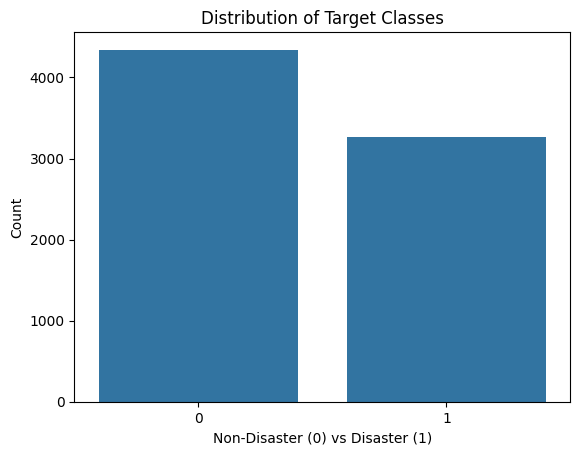

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Classes')
plt.xlabel('Non-Disaster (0) vs Disaster (1)')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(train_df['clean_text']).toarray()
y = train_df['target'].values

print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")


Shape of TF-IDF matrix: (7613, 5000)


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       869
           1       0.85      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



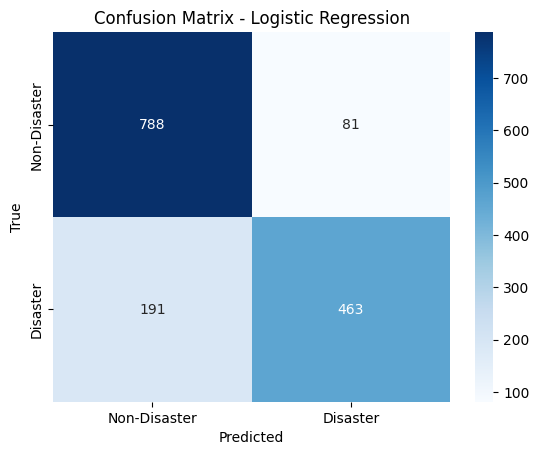

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)
print("Classification Report:\n")
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

log_clf = LogisticRegression(max_iter=1000)
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier(n_estimators=100)

ensemble_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svm', svm_clf),
    ('rf', rf_clf)
], voting='soft')

ensemble_clf.fit(X_train, y_train)

y_pred_ensemble = ensemble_clf.predict(X_val)
print(classification_report(y_val, y_pred_ensemble))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       869
           1       0.83      0.72      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



Classification Report - Ensemble Classifier:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       869
           1       0.83      0.72      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



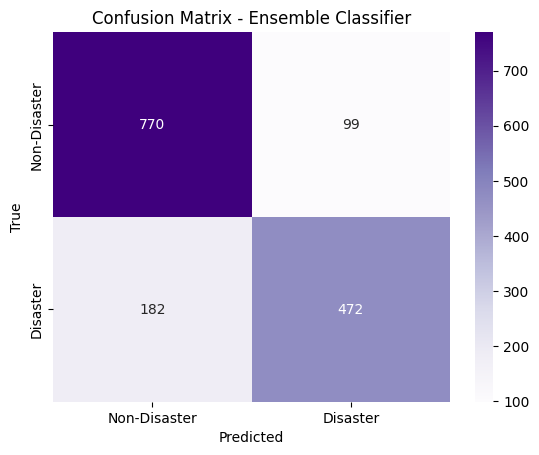

In [ ]:
print("Classification Report - Ensemble Classifier:\n")
print(classification_report(y_val, y_pred_ensemble))

cm = confusion_matrix(y_val, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-Disaster', 'Disaster'],
            yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble Classifier')
plt.show()

Shape of TF-IDF matrix: (7613, 5000)
Training samples: 6090
Validation samples: 1523
Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       869
           1       0.85      0.69      0.76       654

    accuracy                           0.82      1523
   macro avg       0.82      0.80      0.81      1523
weighted avg       0.82      0.82      0.81      1523



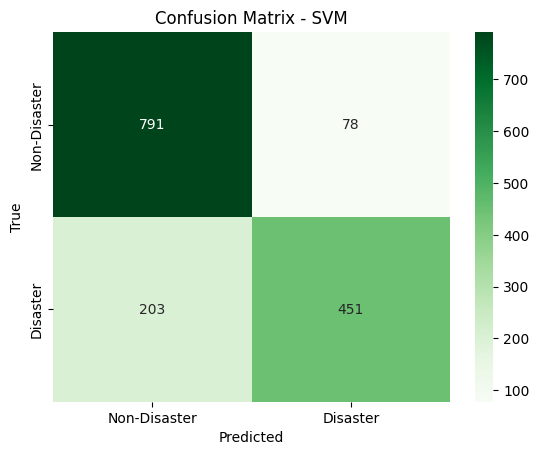

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(train_df['clean_text']).toarray()
y = train_df['target'].values

print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
svm_clf = SVC(probability=True)

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on validation set
y_pred_svm = svm_clf.predict(X_val)

# Evaluation
print("Classification Report - SVM:\n")
print(classification_report(y_val, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Disaster', 'Disaster'],
            yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       869
           1       0.80      0.71      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



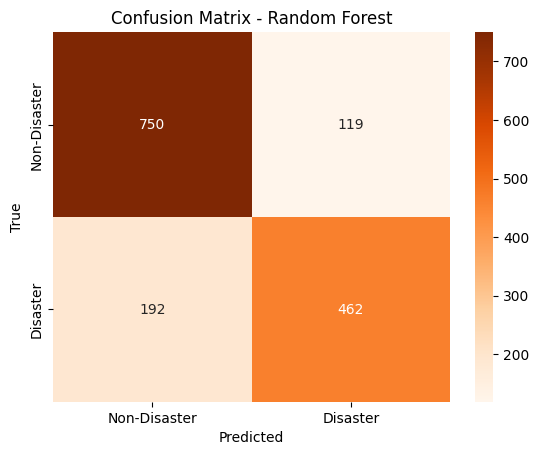

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf_clf.predict(X_val)

# Evaluation
print("Classification Report - Random Forest:\n")
print(classification_report(y_val, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Non-Disaster', 'Disaster'],
            yticklabels=['Non-Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()
